In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import os

from model.generator import FeatureExtractionGenerator
from model.model import FeatureExtraction, Encoder, Decoder

%matplotlib inline

# 包含所有组件和笔画的775字，模型训练用这些字即可
# http://www.flexifont.com/flexifont-chn/mine/
# https://dl.acm.org/doi/pdf/10.1145/2644866.2644886 

# 训练特征提取网络

## 训练源字体

In [2]:
batch_size = 16
learning_rate = 0.0001
epochs = 500
char_size = 80

In [3]:
gen = FeatureExtractionGenerator(char_size=char_size, batch_size=batch_size, images_path='datasets/train', use_left=True)

model = FeatureExtraction()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, amsgrad=True)
              )
if os.path.exists('encoder-basic_font.h5') and os.path.exists('decoder-basic_font.h5'):
    model.encoder.load_weights('encoder-basic_font.h5')
    model.decoder.load_weights('decoder-basic_font.h5')
model.fit(gen,
          epochs=epochs,
          callbacks=[
              tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.90, patience=2, mode='min'),
              tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True, mode='min', verbose=1)
          ])
model.encoder.save_weights('encoder-basic_font.h5')
model.decoder.save_weights('decoder-basic_font.h5')

2528 images found in datasets/train
Epoch 1/500
632/632 [==============================] - 42s 57ms/step - loss: 0.0657 - lr: 1.0000e-04
Epoch 2/500
632/632 [==============================] - 33s 53ms/step - loss: 0.0590 - lr: 1.0000e-04
Epoch 3/500
632/632 [==============================] - 36s 57ms/step - loss: 0.0578 - lr: 1.0000e-04
Epoch 4/500
632/632 [==============================] - 38s 60ms/step - loss: 0.0560 - lr: 1.0000e-04
Epoch 5/500
632/632 [==============================] - 35s 56ms/step - loss: 0.0552 - lr: 1.0000e-04
Epoch 6/500
632/632 [==============================] - 34s 54ms/step - loss: 0.0545 - lr: 1.0000e-04
Epoch 7/500
632/632 [==============================] - 35s 55ms/step - loss: 0.0541 - lr: 1.0000e-04
Epoch 8/500
632/632 [==============================] - 36s 56ms/step - loss: 0.0538 - lr: 1.0000e-04
Epoch 9/500
632/632 [==============================] - 36s 56ms/step - loss: 0.0534 - lr: 1.0000e-04
Epoch 10/500
632/632 [==============================] -

632/632 [==============================] - 36s 57ms/step - loss: 0.0510 - lr: 7.9766e-06
Epoch 82/500
632/632 [==============================] - 37s 58ms/step - loss: 0.0510 - lr: 7.1790e-06
Epoch 83/500
632/632 [==============================] - 36s 57ms/step - loss: 0.0510 - lr: 7.1790e-06
Epoch 84/500
632/632 [==============================] - 35s 55ms/step - loss: 0.0510 - lr: 6.4611e-06
Epoch 85/500
632/632 [==============================] - 35s 55ms/step - loss: 0.0510 - lr: 6.4611e-06
Epoch 86/500
632/632 [==============================] - 36s 56ms/step - loss: 0.0510 - lr: 5.8150e-06
Epoch 87/500
632/632 [==============================] - 36s 57ms/step - loss: 0.0510 - lr: 5.8150e-06
Epoch 88/500
632/632 [==============================] - 35s 56ms/step - loss: 0.0510 - lr: 5.2335e-06
Epoch 89/500
632/632 [==============================] - 37s 58ms/step - loss: 0.0510 - lr: 5.2335e-06
Epoch 90/500
632/632 [==============================] - 37s 59ms/step - loss: 0.0510 - lr: 4.71

Epoch 161/500
632/632 [==============================] - 38s 60ms/step - loss: 0.0509 - lr: 1.1790e-07
Epoch 162/500
632/632 [==============================] - 39s 62ms/step - loss: 0.0509 - lr: 1.0611e-07
Epoch 163/500
632/632 [==============================] - 37s 59ms/step - loss: 0.0509 - lr: 1.0611e-07
Epoch 164/500
632/632 [==============================] - 35s 56ms/step - loss: 0.0509 - lr: 9.5501e-08
Epoch 165/500
632/632 [==============================] - 37s 58ms/step - loss: 0.0509 - lr: 9.5501e-08
Epoch 166/500
632/632 [==============================] - 37s 59ms/step - loss: 0.0509 - lr: 8.5950e-08
Epoch 167/500
632/632 [==============================] - 38s 60ms/step - loss: 0.0509 - lr: 8.5950e-08
Epoch 168/500
632/632 [==============================] - 37s 59ms/step - loss: 0.0509 - lr: 7.7355e-08
Epoch 169/500
632/632 [==============================] - 38s 60ms/step - loss: 0.0509 - lr: 7.7355e-08
Epoch 170/500
632/632 [==============================] - 40s 63ms/step - 

## 训练目标字体

In [4]:
gen = FeatureExtractionGenerator(char_size=char_size, batch_size=batch_size, images_path='datasets/train', use_left=False)

model = FeatureExtraction()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, amsgrad=True))
if os.path.exists('encoder-target_font.h5') and os.path.exists('decoder-target_font.h5'):
    model.encoder.load_weights('encoder-target_font.h5')
    model.decoder.load_weights('decoder-target_font.h5')
model.fit(gen,
          epochs=epochs,
          callbacks=[
              tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.90, patience=2, mode='min'),
              tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True, mode='min', verbose=1)
          ])
model.encoder.save_weights('encoder-target_font.h5')
model.decoder.save_weights('decoder-target_font.h5')

2528 images found in datasets/train
Epoch 1/500
632/632 [==============================] - 38s 58ms/step - loss: 0.0599 - lr: 1.0000e-04
Epoch 2/500
632/632 [==============================] - 37s 58ms/step - loss: 0.0580 - lr: 1.0000e-04
Epoch 3/500
632/632 [==============================] - 37s 59ms/step - loss: 0.0572 - lr: 1.0000e-04
Epoch 4/500
632/632 [==============================] - 38s 60ms/step - loss: 0.0564 - lr: 1.0000e-04
Epoch 5/500
632/632 [==============================] - 39s 61ms/step - loss: 0.0561 - lr: 1.0000e-04
Epoch 6/500
632/632 [==============================] - 37s 58ms/step - loss: 0.0559 - lr: 1.0000e-04
Epoch 7/500
632/632 [==============================] - 36s 56ms/step - loss: 0.0557 - lr: 1.0000e-04
Epoch 8/500
632/632 [==============================] - 36s 57ms/step - loss: 0.0556 - lr: 1.0000e-04
Epoch 9/500
632/632 [==============================] - 36s 58ms/step - loss: 0.0555 - lr: 1.0000e-04
Epoch 10/500
632/632 [==============================] -

632/632 [==============================] - 35s 56ms/step - loss: 0.0546 - lr: 4.2391e-06
Epoch 82/500
632/632 [==============================] - 35s 55ms/step - loss: 0.0546 - lr: 4.2391e-06
Epoch 83/500
632/632 [==============================] - 34s 55ms/step - loss: 0.0546 - lr: 3.8152e-06
Epoch 84/500
632/632 [==============================] - 37s 58ms/step - loss: 0.0546 - lr: 3.8152e-06
Epoch 85/500
632/632 [==============================] - 36s 57ms/step - loss: 0.0546 - lr: 3.4337e-06
Epoch 86/500
632/632 [==============================] - 37s 58ms/step - loss: 0.0546 - lr: 3.4337e-06
Epoch 87/500
632/632 [==============================] - 35s 55ms/step - loss: 0.0546 - lr: 3.0903e-06
Epoch 88/500
632/632 [==============================] - 35s 56ms/step - loss: 0.0546 - lr: 3.0903e-06
Epoch 89/500
632/632 [==============================] - 36s 56ms/step - loss: 0.0546 - lr: 2.7813e-06
Epoch 90/500
632/632 [==============================] - 36s 57ms/step - loss: 0.0546 - lr: 2.78

Epoch 161/500
632/632 [==============================] - 39s 61ms/step - loss: 0.0545 - lr: 6.2658e-08
Epoch 162/500
632/632 [==============================] - 36s 58ms/step - loss: 0.0545 - lr: 6.2658e-08
Epoch 163/500
632/632 [==============================] - 36s 57ms/step - loss: 0.0545 - lr: 5.6392e-08
Epoch 163: early stopping


## 测试特征提取网络（源字体）

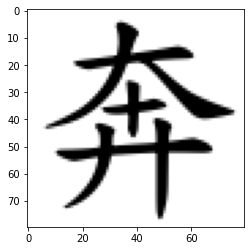

In [5]:
image = tf.keras.utils.load_img('datasets/train/奔.png')
image = tf.keras.preprocessing.image.img_to_array(image)
image = image[:, :80, :] # basic font
image = tf.image.rgb_to_grayscale(image)
plt.imshow(image, cmap='gray')
image = image/255.0

In [6]:
source_encoder = Encoder()
source_encoder.load_weights('encoder-basic_font.h5')
source_decoder = Decoder()
source_decoder.load_weights('decoder-basic_font.h5')

In [7]:
predicted_source_image = source_encoder.predict(np.array([image]))[0]
print(predicted_source_image.shape)
predicted_target_image = source_decoder.predict(np.array([predicted_source_image]))[0]
predicted_target_image.shape

1/1 [==============================] - 0s 250ms/step
(10, 10, 256)
1/1 [==============================] - 1s 531ms/step


(80, 80, 1)

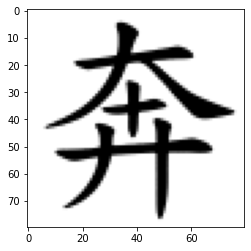

In [8]:
predicted_target_image = predicted_target_image*255.
predicted_target_image = predicted_target_image.astype(np.uint8)
plt.imshow(predicted_target_image, cmap='gray')